# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
import requests
import json
import pprint as pp
from api_keys import weather_api_key

###https://openweathermap.org/api


#apiData()

dir = os.getcwd()
print(dir)
data_csv = pd.read_csv("output_data/cities.csv")
print(data_csv)

C:\Users\james\OneDrive\Documents\BOOTCAMP\Unit06 - Python\Today-api\Instructions\starter_code
     City_ID         City  Cloudiness Country        Date  Humidity    Lat  \
0          0    ostrovnoy           2      RU  1558378754        72  68.05   
1          1    mahebourg          75      MU  1558378503        74 -20.41   
2          2      qaanaaq          25      GL  1558378755        73  77.48   
3          3       zhuhai           0      CN  1558378755        39  40.71   
4          4    cape town          20      ZA  1558378755        76 -33.93   
..       ...          ...         ...     ...         ...       ...    ...   
543      543       yabrud           0      SY  1558378840        32  33.97   
544      544      paraiso           5      MX  1558378898         4  24.01   
545      545      veraval           0      FR  1558378898        62  49.65   
546      546  novyy urgal         100      RU  1558378899        93  51.07   
547      547      tongren           4      CN  

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
## Generate Cities List
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)
#print(cities)

640

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

latitude = []
temperature = []
humidity = []
clouds = []
windspeed = []
nocity = 0
print("Size of City Set: ",len(cities))
# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}"
    json_data = requests.get(query_url).json()
    try:
        latitude.append(json_data['coord']['lat'])
        temperature.append(json_data['main']['temp'])
        humidity.append(json_data['main']['humidity'])
        clouds.append(json_data['clouds']['all'])
        windspeed.append(json_data['wind']['speed'])
    except:
        nocity += 1
        #print('City not Found', nocity, " times!")
print(nocity," Qty of Cities not found")

Size of City Set:  640
54  Qty of Cities not found


In [4]:
print("SIZE OF LISTS: ",len(latitude)," ",len(temperature)," ",len(humidity)," ",len(clouds)," ",len(windspeed))
# print(latitude)
# print(temperature)
# print(humidity)
# print(clouds)
#print("WIND SPEED ",windspeed)


weather_dict = {
    "lat": latitude,
    "temp": temperature,
    "humidity": humidity,
    "cloudiness": clouds,
    "windspeed": windspeed,
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data['windspeed'])

SIZE OF LISTS:  586   586   586   586   586
0       6.08
1      12.30
2       0.45
3       3.60
4       2.60
       ...  
581     1.41
582     3.10
583     7.65
584     4.10
585     4.60
Name: windspeed, Length: 586, dtype: float64


#### Latitude vs. Temperature Plot

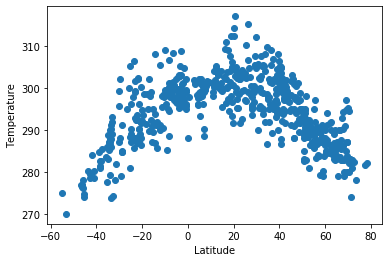

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

#### Latitude vs. Humidity Plot

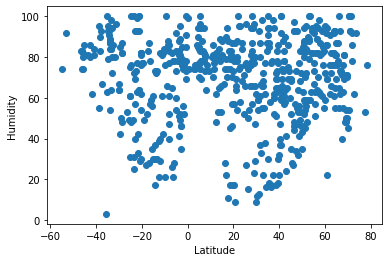

In [6]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

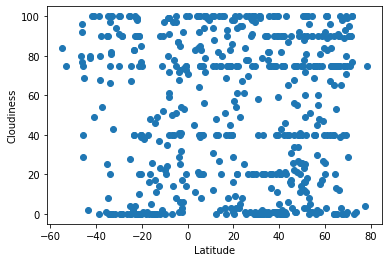

In [7]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

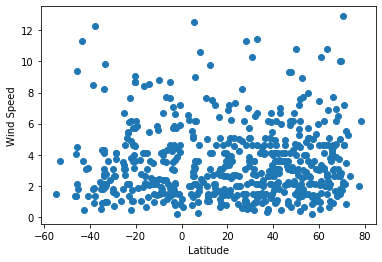

In [8]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['windspeed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression